In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('netflix2.csv')


df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:

df.info()

# Check for null values
df.isnull().sum()

# Shape of dataset
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(8807, 12)

# 1. CONTENT STRATEGY
# Q1. What is the ratio of Movies vs TV Shows?

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\3962059819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_type.index, y=content_type.values, palette='Set2')


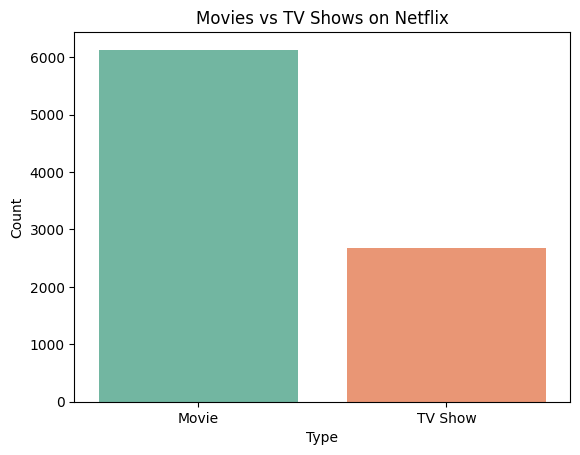

Ratio of Movies to TV Shows: 2.29


In [3]:
content_type = df['type'].value_counts()
sns.barplot(x=content_type.index, y=content_type.values, palette='Set2')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

ratio = content_type['Movie'] / content_type['TV Show']
print("Ratio of Movies to TV Shows:", round(ratio, 2))


# Q2. Which genres are most popular on Netflix globally?

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\3803321125.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')


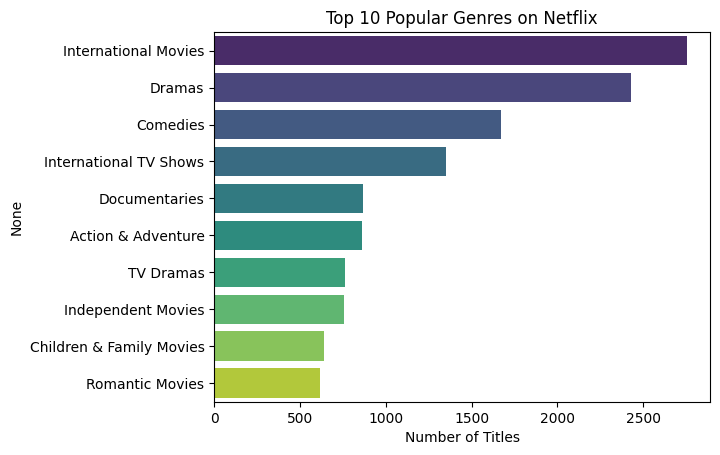

In [4]:
from collections import Counter

# Split and count all genres
genre_list = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
all_genres = [genre for sublist in genre_list for genre in sublist]
genre_count = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)

sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')
plt.title('Top 10 Popular Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()


# Q3. Which years saw the highest release of content on Netflix?

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\1769748110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_year', data=df, order=df['release_year'].value_counts().index[:20], palette='coolwarm')


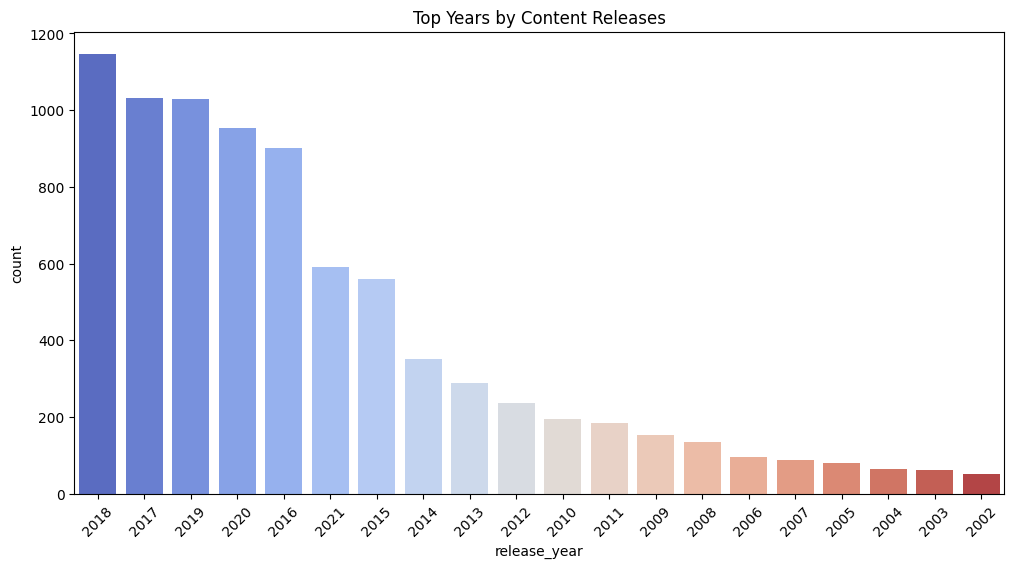

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=df, order=df['release_year'].value_counts().index[:20], palette='coolwarm')
plt.title('Top Years by Content Releases')
plt.xticks(rotation=45)
plt.show()


# Q4. Which countries produce the most Netflix content?

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\3803492043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.values, y=country_count.index, palette='mako')


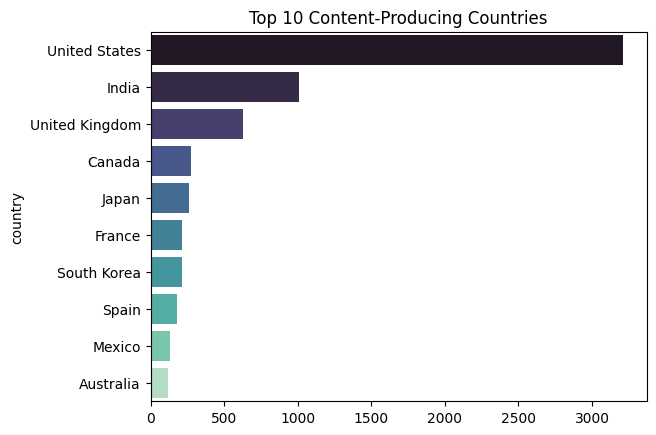

In [6]:
country_count = df['country'].dropna().apply(lambda x: x.split(',')[0]).value_counts().head(10)
sns.barplot(x=country_count.values, y=country_count.index, palette='mako')
plt.title('Top 10 Content-Producing Countries')
plt.show()


# Q5. How has the trend of adding new content evolved year by year?

In [7]:

# Convert the 'date_added' column safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month for analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df[['date_added', 'year_added', 'month_added']].head()


,date_added,year_added,month_added
0,2021-09-25,2021.0,9.0
1,2021-09-24,2021.0,9.0
2,2021-09-24,2021.0,9.0
3,2021-09-24,2021.0,9.0
4,2021-09-24,2021.0,9.0


# Q6. Which ratings are most frequent on Netflix?

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\1155353351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_count.values, y=rating_count.index, palette='cool')


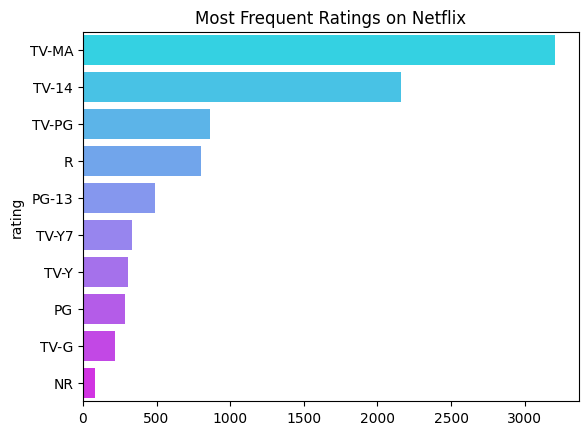

In [8]:
rating_count = df['rating'].value_counts().head(10)
sns.barplot(x=rating_count.values, y=rating_count.index, palette='cool')
plt.title('Most Frequent Ratings on Netflix')
plt.show()


### Q7. Do some countries produce more mature content (TV-MA)?

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\430345299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_ma_countries.values, y=tv_ma_countries.index, palette='rocket')


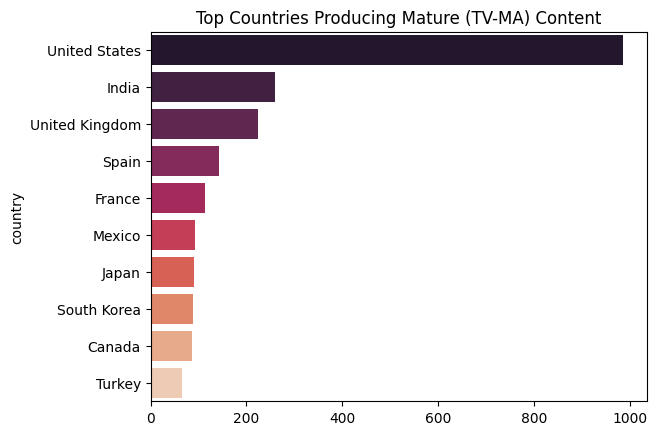

In [9]:
tv_ma_countries = df[df['rating'] == 'TV-MA']['country'].dropna().apply(lambda x: x.split(',')[0]).value_counts().head(10)
sns.barplot(x=tv_ma_countries.values, y=tv_ma_countries.index, palette='rocket')
plt.title('Top Countries Producing Mature (TV-MA) Content')
plt.show()


# Q8. Which genres are more associated with TV Shows vs Movies?

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\23682950.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres = genre_count.groupby('type').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


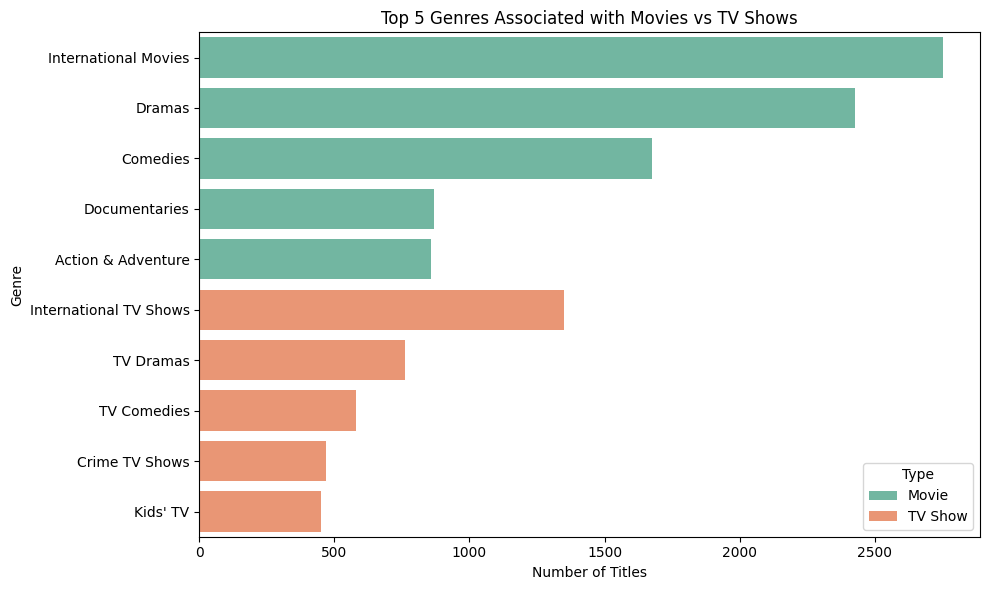

In [10]:
# Q8: Which genres are more associated with TV Shows vs Movies?


from collections import Counter

# Step 1: Expand the genres (split comma-separated values into individual rows)
genre_df = (
    df.assign(genre=df['listed_in'].str.split(','))
      .explode('genre')
      .assign(genre=lambda x: x['genre'].str.strip())
      .dropna(subset=['genre'])
)

# Step 2: Count how many times each genre appears for each content type
genre_count = genre_df.groupby(['type', 'genre']).size().reset_index(name='count')

# Step 3: For each type (Movie/TV Show), get the top 5 genres
top_genres = genre_count.groupby('type').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Step 4: Plot the results
plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='count', y='genre', hue='type', palette='Set2')
plt.title('Top 5 Genres Associated with Movies vs TV Shows')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


# Q9. Which genres dominate the U.S. vs other countries

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\3063119470.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=us_genres.values, y=us_genres.index, ax=ax[0], palette='Set1')
C:\Users\chand\AppData\Local\Temp\ipykernel_11572\3063119470.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=other_genres.values, y=other_genres.index, ax=ax[1], palette='Set2')


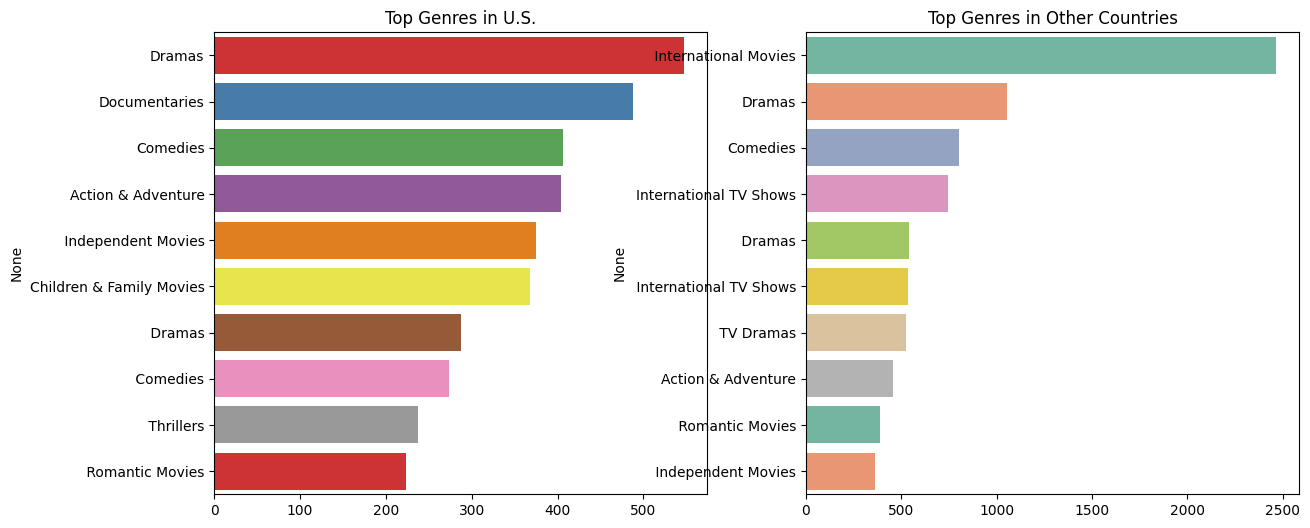

In [11]:
us = df[df['country'].str.contains('United States', na=False)]
other = df[~df['country'].str.contains('United States', na=False)]

us_genres = pd.Series(Counter(','.join(us['listed_in'].dropna()).split(','))).sort_values(ascending=False).head(10)
other_genres = pd.Series(Counter(','.join(other['listed_in'].dropna()).split(','))).sort_values(ascending=False).head(10)

fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.barplot(x=us_genres.values, y=us_genres.index, ax=ax[0], palette='Set1')
sns.barplot(x=other_genres.values, y=other_genres.index, ax=ax[1], palette='Set2')
ax[0].set_title('Top Genres in U.S.')
ax[1].set_title('Top Genres in Other Countries')
plt.show()


# Q10. What genres are most popular in the last 3 years?

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\622434915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recent_genres.values, y=recent_genres.index, palette='crest')


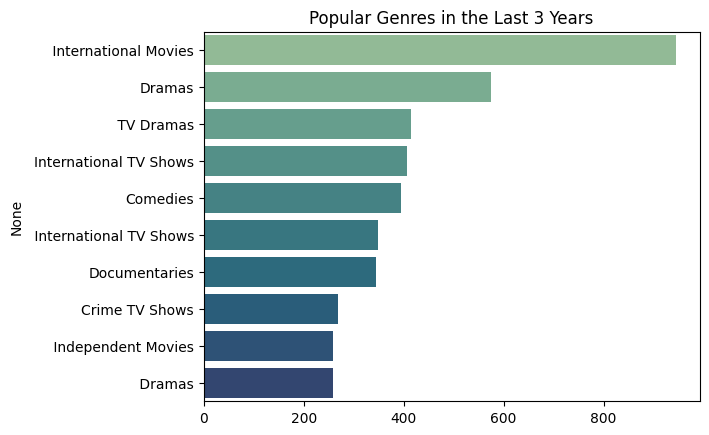

In [12]:
recent = df[df['release_year'] >= (df['release_year'].max() - 3)]
recent_genres = pd.Series(Counter(','.join(recent['listed_in'].dropna()).split(','))).sort_values(ascending=False).head(10)

sns.barplot(x=recent_genres.values, y=recent_genres.index, palette='crest')
plt.title('Popular Genres in the Last 3 Years')
plt.show()


# Q11. Who are the top 10 directors with the most Netflix content? Q

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\2467774693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues')


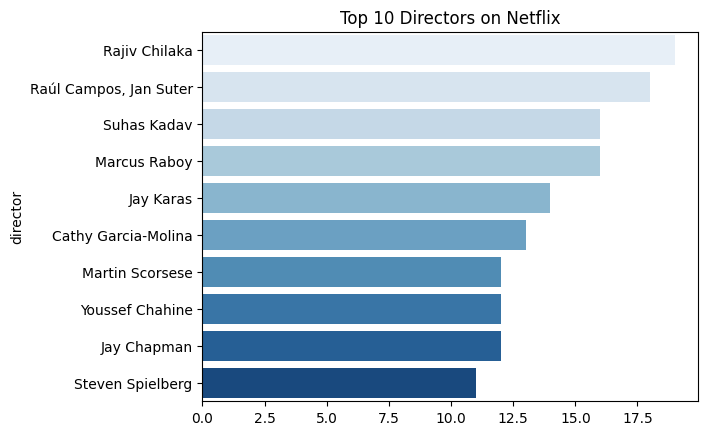

In [13]:
top_directors = df['director'].dropna().value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues')
plt.title('Top 10 Directors on Netflix')
plt.show()


## Q12.Which actors appear most frequently in Netflix shows? 

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\1915210938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_count.values, y=actor_count.index, palette='Purples')


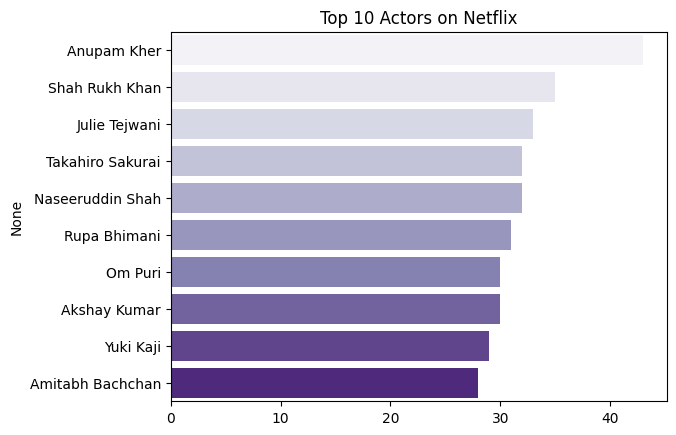

In [14]:
actors = df['cast'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
all_actors = [actor for sublist in actors for actor in sublist]
actor_count = pd.Series(Counter(all_actors)).sort_values(ascending=False).head(10)

sns.barplot(x=actor_count.values, y=actor_count.index, palette='Purples')
plt.title('Top 10 Actors on Netflix')
plt.show()


# Q13. Which director-genre pairs are most frequent?

In [15]:
pair_df = df.dropna(subset=['director', 'listed_in'])
pairs = pair_df.groupby(['director', 'listed_in']).size().reset_index(name='count')
top_pairs = pairs.sort_values(by='count', ascending=False).head(10)
top_pairs


,director,listed_in,count
4130,"Raúl Campos, Jan Suter",Stand-Up Comedy,18
4061,Rajiv Chilaka,Children & Family Movies,18
3088,Marcus Raboy,Stand-Up Comedy,15
2119,Jay Karas,Stand-Up Comedy,13
2115,Jay Chapman,Stand-Up Comedy,11
4633,Shannon Hartman,Stand-Up Comedy,8
4403,S.S. Rajamouli,"Action & Adventure, Dramas, International Movies",7
1870,Hidenori Inoue,"Action & Adventure, Dramas, International Movies",7
3974,Prakash Satam,"Children & Family Movies, Comedies",7
4396,Ryan Polito,Stand-Up Comedy,7


 # Q14. Titles with unknown directors or cast

In [16]:
unknown_directors = df['director'].isnull().sum()
unknown_cast = df['cast'].isnull().sum()
print("Titles with Unknown Director:", unknown_directors)
print("Titles with Unknown Cast:", unknown_cast)


Titles with Unknown Director: 2634
Titles with Unknown Cast: 825


## Q15. What is the average duration of Movies on Netflix?

In [17]:

df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_mins'] = df_movies['duration'].str.replace(' min', '').astype(float)
avg_duration = df_movies['duration_mins'].mean()
print(f"\nAverage Movie Duration: {avg_duration:.2f} minutes")



Average Movie Duration: 99.58 minutes


## Q16. What’s the most common number of seasons for TV shows?

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\1515236199.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seasons', data=df_tv, hue=None, palette='coolwarm')


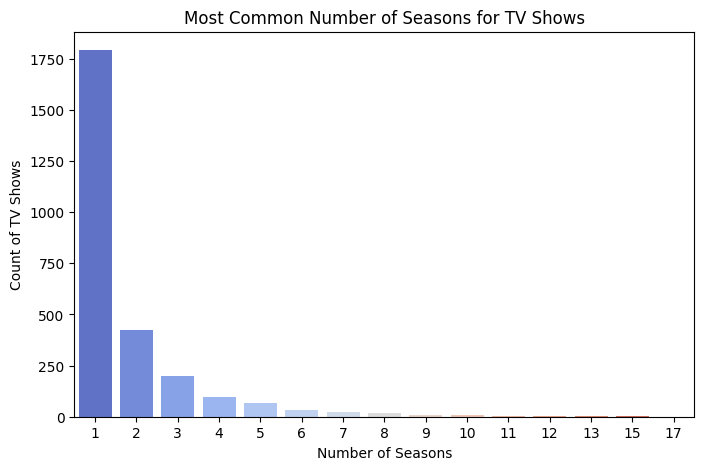

In [18]:


import seaborn as sns
import matplotlib.pyplot as plt

# Make a safe copy to avoid warnings
df_tv = df[df['type'] == 'TV Show'].copy()

# Clean the duration column and extract number of seasons
df_tv.loc[:, 'seasons'] = (
    df_tv['duration']
    .str.replace(' Season', '', regex=False)
    .str.replace('s', '', regex=False)
    .astype(int)
)

# Plot the season distribution
plt.figure(figsize=(8,5))
sns.countplot(x='seasons', data=df_tv, hue=None, palette='coolwarm')
plt.title('Most Common Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count of TV Shows')
plt.show()


## Q17. Is there a trend in movie durations over the years?

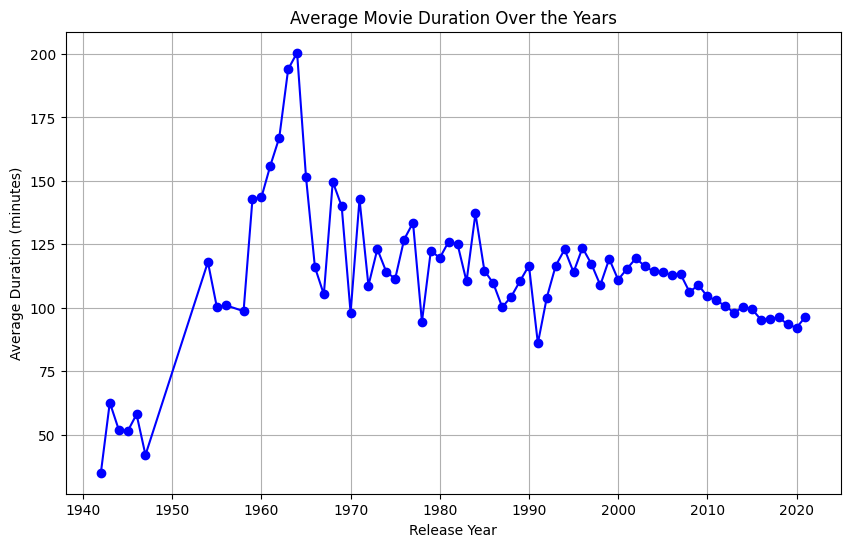

In [19]:
df_movie = df[df['type'] == 'Movie'].copy()

# Extract duration in minutes (convert "90 min" → 90)
df_movie['duration_mins'] = df_movie['duration'].str.replace(' min', '', regex=False).astype(float)

# Group by release year and calculate average movie duration
movie_trend = df_movie.groupby('release_year')['duration_mins'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(movie_trend.index, movie_trend.values, marker='o', color='blue')
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

## Q18.In which months does Netflix add the most content?

C:\Users\chand\AppData\Local\Temp\ipykernel_11572\1053470136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_count.index, y=month_count.values, palette='Spectral')


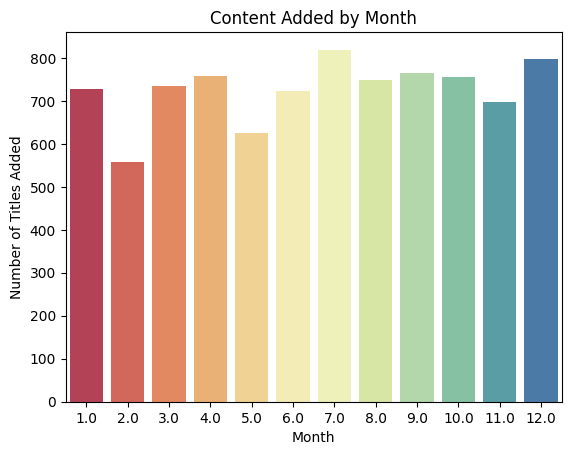

In [20]:
df['month_added'] = pd.to_datetime(df['date_added']).dt.month
month_count = df['month_added'].value_counts().sort_index()

sns.barplot(x=month_count.index, y=month_count.values, palette='Spectral')
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.show()


 # Q19 How does the genre distribution vary across different years?

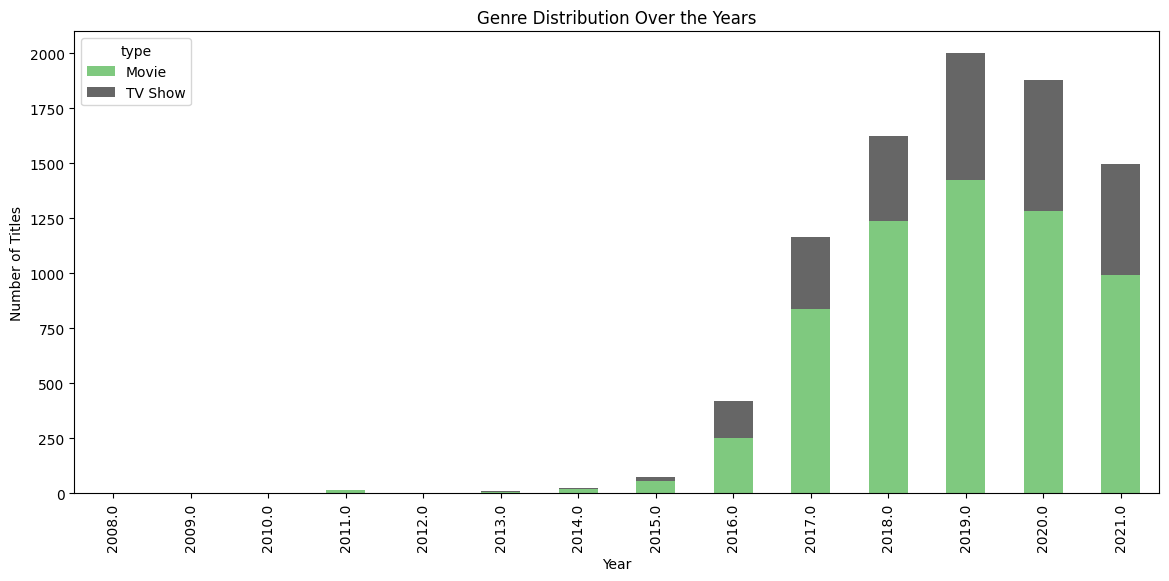

In [21]:
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
genre_trend = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
genre_trend.plot(kind='bar', stacked=True, figsize=(14,6), colormap='Accent')
plt.title('Genre Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


# Q20. Which countries produce the most content in each genre

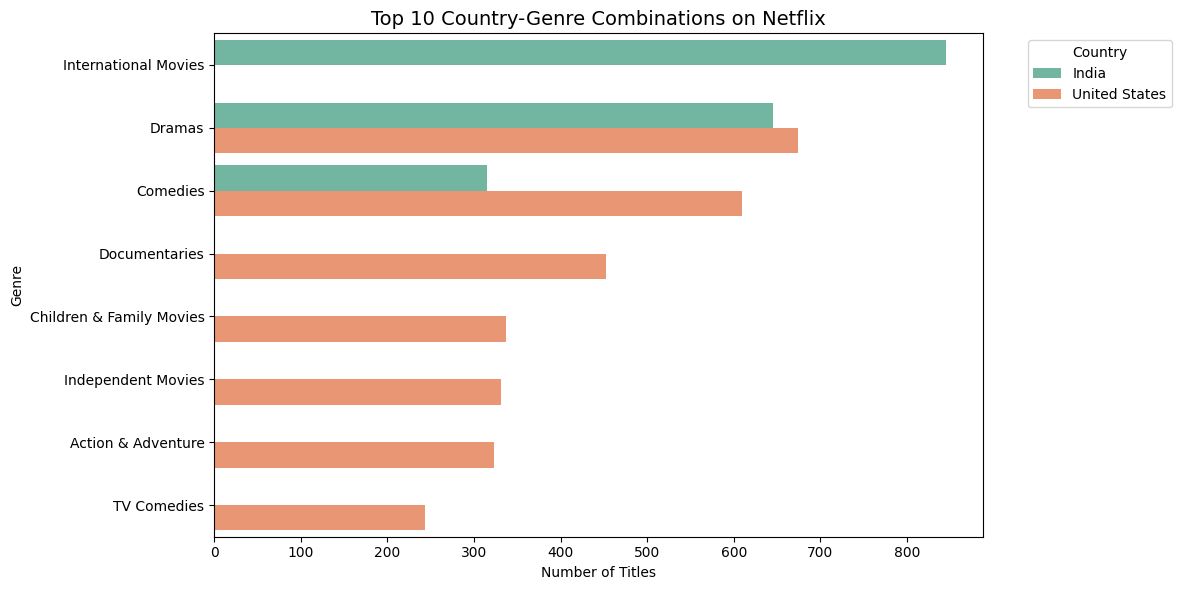

In [22]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean data — drop nulls safely
country_genre = df.dropna(subset=['country', 'listed_in']).copy()

# Step 2: Extract only the first country name (if multiple)
country_genre.loc[:, 'country'] = country_genre['country'].apply(lambda x: x.split(',')[0])

# Step 3: Split genres (since many rows have multiple genres)
country_genre = country_genre.assign(genre=country_genre['listed_in'].str.split(',')).explode('genre')
country_genre['genre'] = country_genre['genre'].str.strip()

# Step 4: Count number of titles by (country, genre)
genre_counts = (
    country_genre.groupby(['country', 'genre'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Step 5: Take the Top 10 country-genre combinations
top10 = genre_counts.head(10)

# Step 6: Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='count', y='genre', hue='country', palette='Set2')
plt.title('Top 10 Country-Genre Combinations on Netflix', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
